<a href="https://colab.research.google.com/github/crescent98/machinelearning35911/blob/master/assignment08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

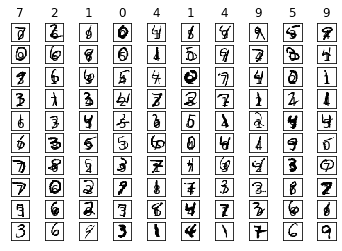

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import sys

file_data   = "mnist_test.csv"
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_image   = len(data)
count       = 0     # count for the number of images

#
# make a matrix each column of which represents an images in a vector form 
#
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)

for line in data:

    line_data   = line.split(',') #한 줄 한 줄의 data
    label       = line_data[0]    #0 번째 -> label
    im_vector   = np.asfarray(line_data[1:]) #1부터 끝까지 -> image 에 대한 정보

    list_label[count]       = label
    list_image[:, count]    = im_vector    

    count += 1

# 
# plot first 100 images out of 10,000 with their labels
# 
f1 = plt.figure(1)

for i in range(100):

    label       = list_label[i]       # i 번째 사진의 label
    im_vector   = list_image[:, i]    # i 번째 사진의 정보, 그냥 순차적으로 하나의 matrix에 더한 느낌
    im_matrix   = im_vector.reshape((size_row, size_col)) # i 번째 사진의 정보 -> vector의 matrix 화

    plt.subplot(10, 10, i+1)  ## *** 이 부분을 수정하는 데 왜 문제가 생길까
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()


*Average Image for Each Digit*

In [0]:
aver=[np.empty((1,784),dtype=float),
      np.empty((1,784),dtype=float),
      np.empty((1,784),dtype=float),
      np.empty((1,784),dtype=float),
      np.empty((1,784),dtype=float),
      np.empty((1,784),dtype=float),
      np.empty((1,784),dtype=float),
      np.empty((1,784),dtype=float),
      np.empty((1,784),dtype=float),
      np.empty((1,784),dtype=float)]

aver_count={0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 
            5: 0, 6: 0, 7: 0, 8: 0, 9: 0}

for i in range(0,len(list_label)):
  aver[list_label[i]]=aver[list_label[i]]+list_image[:,i]
  aver_count[list_label[i]]=aver_count[list_label[i]]+1

for i in range(0,10):
  aver[i]=aver[i]/aver_count[i]

*Forward Propagation with Random Weight*

In [0]:
#functions
def g_function(theta,x):
  total=theta*x
  return total.sum()

def h_function(x,theta):
  return (1/(1+np.exp((-1)*g_function(theta,x))))

In [16]:
theta=np.random.normal(loc=0.0,scale=1.0,size=784)

logistic_aver=np.zeros(10)
logistic_total=np.zeros(10)

for i in range(0,len(list_label)):
  x=list_image[:,i]
  temp=h_function(x,theta)
  logistic_total[list_label[i]]=logistic_total[list_label[i]]+temp

for i in range(0,10):
  logistic_aver[i]=logistic_total[i]/aver_count[i]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


# ***Results***

# ***1. Plot the Average Image***

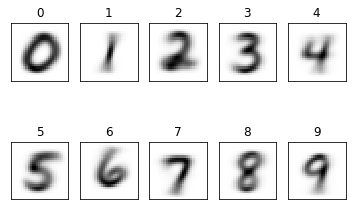

In [17]:
f1 = plt.figure(1)

for i in range(0,10):
  im_matrix=aver[i].reshape((size_row,size_col))
  label=i

  plt.subplot(2,5,i+1)
  plt.title(label)
  plt.imshow(im_matrix,cmap='Greys',interpolation='None')

  frame=plt.gca()
  frame.axes.get_xaxis().set_visible(False)
  frame.axes.get_yaxis().set_visible(False)
plt.show()

# ***2. Present the output of the neural network with random weights***

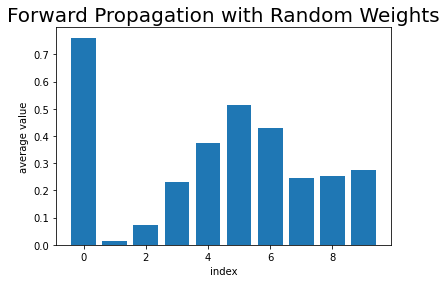

In [18]:
index=np.arange(0,10)
plt.bar(index,logistic_aver)
plt.title('Forward Propagation with Random Weights',fontsize=20)
plt.xlabel("index")
plt.ylabel("average value")
plt.show()

In [19]:
for i in range(0,10):
  print("the average value for", i, "=",logistic_aver[i])

the average value for 0 = 0.7612843328934396
the average value for 1 = 0.014977973568281937
the average value for 2 = 0.07330204540686869
the average value for 3 = 0.22938245459431006
the average value for 4 = 0.3747887910860523
the average value for 5 = 0.5140634605027753
the average value for 6 = 0.4296287787790752
the average value for 7 = 0.24728492233336297
the average value for 8 = 0.2532058134437184
the average value for 9 = 0.27337902607285525
